In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/envs/test/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
# import patoolib
# patoolib.extract_archive('../data/videos.zip', outdir='../data/compressed/')

In [5]:
%cd  ../data

/home/jupyter/sign-language-translation/slt/data


In [7]:
! chmod 700 download.sh
! ./download.sh

--2021-01-09 21:48:47--  http://cihancamgoz.com/files/cvpr2020/phoenix14t.pami0.train
Resolving cihancamgoz.com (cihancamgoz.com)... 192.232.218.145
Connecting to cihancamgoz.com (cihancamgoz.com)|192.232.218.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1935289362 (1.8G)
Saving to: ‘phoenix14t.pami0.train’

phoenix14t.pami0.tr 100%[===================>]   1.80G  16.4MB/s    in 1m 40s  

2021-01-09 21:50:28 (18.4 MB/s) - ‘phoenix14t.pami0.train’ saved [1935289362/1935289362]

--2021-01-09 21:50:28--  http://cihancamgoz.com/files/cvpr2020/phoenix14t.pami0.dev
Resolving cihancamgoz.com (cihancamgoz.com)... 192.232.218.145
Connecting to cihancamgoz.com (cihancamgoz.com)|192.232.218.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130831227 (125M)
Saving to: ‘phoenix14t.pami0.dev’

phoenix14t.pami0.de 100%[===================>] 124.77M  20.6MB/s    in 7.1s    

2021-01-09 21:50:35 (17.7 MB/s) - ‘phoenix14t.pami0.dev’ saved [1308312

In [2]:
# move downloaded file to PHOENIX2014t/

/home/jupyter/sign-language-translation/slt/notebooks


In [3]:
%cd ..

/home/jupyter/sign-language-translation/slt


## **Precomputed features**

In [4]:
import yaml

with open(r'configs/sign.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

dict(config)

{'name': 'sign_experiment',
 'data': {'data_path': './data/',
  'version': 'phoenix_2014_trans',
  'sgn': 'sign',
  'txt': 'text',
  'gls': 'gloss',
  'train': 'PHOENIX2014T/phoenix14t.pami0.train',
  'dev': 'PHOENIX2014T/phoenix14t.pami0.dev',
  'test': 'PHOENIX2014T/phoenix14t.pami0.test',
  'feature_size': 1024,
  'level': 'word',
  'txt_lowercase': True,
  'max_sent_length': 400,
  'random_train_subset': -1,
  'random_dev_subset': -1},
 'testing': {'recognition_beam_sizes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'translation_beam_sizes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'translation_beam_alphas': [-1, 0, 1, 2, 3, 4, 5]},
 'training': {'reset_best_ckpt': False,
  'reset_scheduler': False,
  'reset_optimizer': False,
  'random_seed': 42,
  'model_dir': './sign_sample_model',
  'recognition_loss_weight': 1.0,
  'translation_loss_weight': 1.0,
  'eval_metric': 'bleu',
  'optimizer': 'adam',
  'learning_rate': 0.001,
  'batch_size': 32,
  'num_valid_log': 5,
  'epochs': 50,
  'early_stopp

In [5]:
from signjoey import data
train_data, dev_data, test_data, gls_vocab, txt_vocab = data.load_data(config['data'])

In [6]:
train_data.fields

{'sequence': <torchtext.data.field.RawField at 0x7f6112cea780>,
 'signer': <torchtext.data.field.RawField at 0x7f6112ceaba8>,
 'sgn': <torchtext.data.field.Field at 0x7f60cfe96a20>,
 'gls': <torchtext.data.field.Field at 0x7f6112bfec18>,
 'txt': <torchtext.data.field.Field at 0x7f6112bfe320>}

In [7]:
images = vars(train_data.examples[0])['sgn']
text = vars(train_data.examples[0])['txt']
gls = vars(train_data.examples[0])['gls']
seq = vars(train_data.examples[0])['sequence']

print(len(images))
print(seq)
print(text)
print(gls)

86
train/11August_2010_Wednesday_tagesschau-1
['und', 'nun', 'die', 'wettervorhersage', 'für', 'morgen', 'donnerstag', 'den', 'zwölften', 'august', '.']
['JETZT', 'WETTER', 'MORGEN', 'DONNERSTAG', 'ZWOELF', 'FEBRUAR']


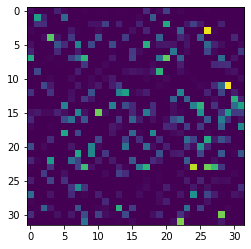

In [10]:
imshow(images[12].numpy().reshape(32,32))

In [11]:
!pwd

/home/jupyter/sign-language-translation/slt


In [12]:

# %reload_ext tensorboard
# %tensorboard --logdir sign_sample_model/tensorboard/

In [ ]:
! python -m signjoey train configs/sign.yaml

2021-01-10 00:34:37.599879: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-10 00:34:38.355641: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-10 00:34:38.356265: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-01-10 00:34:38.356313: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-10 00:34:38.358343: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-10 00:34:38.360259: I tensorflow/stream_executor/platform/default/d